## 1. Cleaning and Exploring the data

In [31]:
#loading packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from scipy.stats import chi2_contingency

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
cars.shape

(180, 11)

In [34]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             180 non-null    object
 1   Subtitle         180 non-null    object
 2   Acceleration     180 non-null    object
 3   TopSpeed         180 non-null    object
 4   Range            180 non-null    object
 5   Efficiency       180 non-null    object
 6   FastChargeSpeed  180 non-null    object
 7   Drive            180 non-null    object
 8   NumberofSeats    180 non-null    int64 
 9   PriceinGermany   168 non-null    object
 10  PriceinUK        136 non-null    object
dtypes: int64(1), object(10)
memory usage: 15.6+ KB


In [35]:
cars.describe()

,NumberofSeats
count,180.000000
mean,5.166667
std,0.971666
min,2.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,7.000000


In [36]:
cars.isnull().sum()

Name                0
Subtitle            0
Acceleration        0
TopSpeed            0
Range               0
Efficiency          0
FastChargeSpeed     0
Drive               0
NumberofSeats       0
PriceinGermany     12
PriceinUK          44
dtype: int64

Text(0.5, 1.0, 'Total Missing Values')

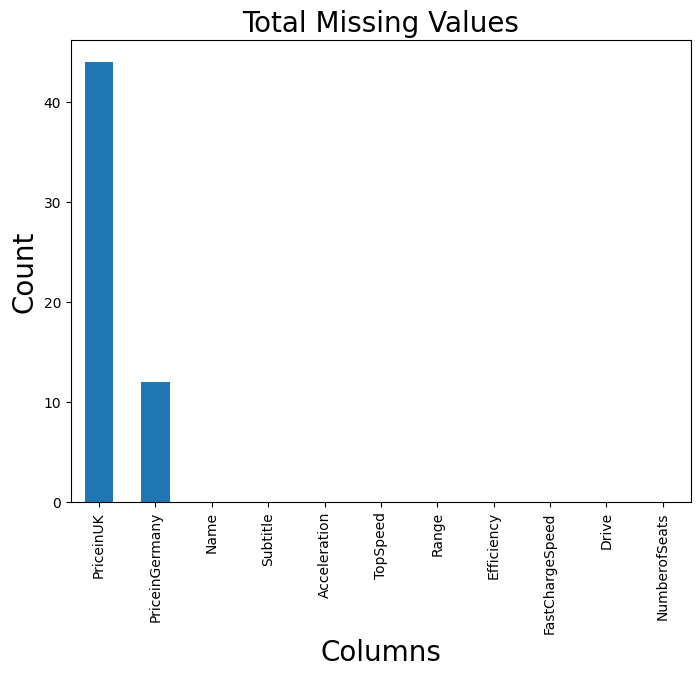

In [37]:
#finding and filling in NA's
total = cars.isnull().sum().sort_values(ascending = False)
total_select = total.head(11)
total_select.plot(kind='bar', figsize = (8,6), fontsize =10)

plt.xlabel('Columns', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.title('Total Missing Values', fontsize=20)

We've only got NA's in the PriceinUK and PriceinGermany columns, so we'll go about fixing them by replacing them with 0's since the NA's represent the cars being unavailable for sale in those countries.

In [38]:
cars1 = cars.fillna('0')

Now we'll remove the currency symbols so that prices can be read as integers.

In [39]:
PriceinUK=[]
for item in cars1['PriceinUK']:
    PriceinUK+=[int(item.replace('£','').replace(',',''))]
cars1['PriceinUK']=PriceinUK

In [40]:
PriceinGermany=[]
for item in cars1['PriceinGermany']:
    PriceinGermany+=[int(item.replace('€','').replace(',',''))]
cars1['PriceinGermany'] = PriceinGermany

Now we'll replace measurements in the Subtitle, Efficiency, Range, TopSpeed, Acceleration, and FastChargeSpeed columns so those observations can be read as integers.

In [41]:
Acceleration=[]
for item in cars1['Acceleration']:
    Acceleration+=[float(item.replace(' sec', ''))]
cars1['Acceleration']=Acceleration

In [42]:
FastChargeSpeed=[]
for item in cars1['FastChargeSpeed']:
    FastChargeSpeed+=[int(item.replace(' km/h','').replace('-','0'))]
cars1['FastChargeSpeed']=FastChargeSpeed

In [43]:
Efficiency=[]
for item in cars1['Efficiency']:
    Efficiency+=[int(item.replace(' Wh/km', ''))]
cars1['Efficiency']=Efficiency

In [44]:
Range=[]
for item in cars1['Range']:
    Range+=[int(item.replace(' km', ''))]
cars1['Range']=Range

In [45]:
TopSpeed=[]
for item in cars1['TopSpeed']:
    TopSpeed+=[int(item.replace(' km/h',''))]
cars1['TopSpeed']=TopSpeed

Since the subtitle has the battery size, we'll replace it with just the kWh measure.

In [46]:
Subtitle=[]
for item in cars1['Subtitle']:
    Subtitle+=[float(item.replace('Battery Electric Vehicle | ','').replace(' kWh','').replace('      ',''))]
cars1['Subtitle']=Subtitle

In [47]:
cars1.head(10)

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,42990,0
1,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0,31680
2,Nissan Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,29990,25995
3,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0,79900
4,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336,138830
5,Nissan e-NV200 Evalia,36.0,14.0,123,165,218,170,Front Wheel Drive,7,43433,30255
6,Volkswagen ID.3 Pure Performance,45.0,8.9,160,275,164,260,Rear Wheel Drive,5,31960,27120
7,BMW iX3,74.0,6.8,180,385,192,520,Rear Wheel Drive,5,66300,58850
8,Nissan Leaf e+,56.0,7.3,157,325,172,390,Front Wheel Drive,5,38350,30445
9,BMW i3 120 Ah,37.9,7.3,150,235,161,270,Rear Wheel Drive,4,39000,31305


Now we can encode the names of each cars as unique ID numbers

In [48]:
df=cars1
from sklearn.preprocessing import LabelEncoder
for c in df.columns:
    if df[c].dtype=='object':
        df[c] = df[c].fillna('N')
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(df[c].values)
df.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,97,58.0,7.3,150,335,173,210,1,5,42990,0
1,127,31.0,22.4,130,160,194,0,1,5,0,31680
2,94,36.0,7.9,144,220,164,230,1,5,29990,25995
3,15,86.5,5.7,200,375,231,600,0,5,0,79900
4,125,83.7,2.8,260,390,215,860,0,4,186336,138830


In [49]:
df.columns

Index(['Name', 'Subtitle', 'Acceleration', 'TopSpeed', 'Range', 'Efficiency',
       'FastChargeSpeed', 'Drive', 'NumberofSeats', 'PriceinGermany',
       'PriceinUK'],
      dtype='object')

In [50]:
df.describe()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,85.550000,65.263889,7.854444,176.400000,337.388889,194.272222,467.888889,0.894444,5.166667,54810.361111,39998.400000
std,50.469668,24.952074,3.169465,42.096006,118.718078,32.684001,252.128346,0.773133,0.971666,34852.347982,33768.589005
min,0.000000,16.700000,2.100000,123.000000,95.000000,104.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,42.750000,45.000000,5.575000,150.000000,258.750000,168.000000,280.000000,0.000000,5.000000,35425.000000,19646.250000
50%,84.500000,66.500000,7.500000,160.000000,340.000000,188.500000,420.000000,1.000000,5.000000,49500.000000,37270.000000
75%,129.250000,77.400000,9.625000,200.000000,400.000000,215.250000,590.000000,1.250000,5.000000,62262.500000,55912.500000
max,173.000000,200.000000,22.400000,410.000000,970.000000,281.000000,1410.000000,2.000000,7.000000,215000.000000,189000.000000


Now let's take a look at how the variables are distributed.

<Axes: >

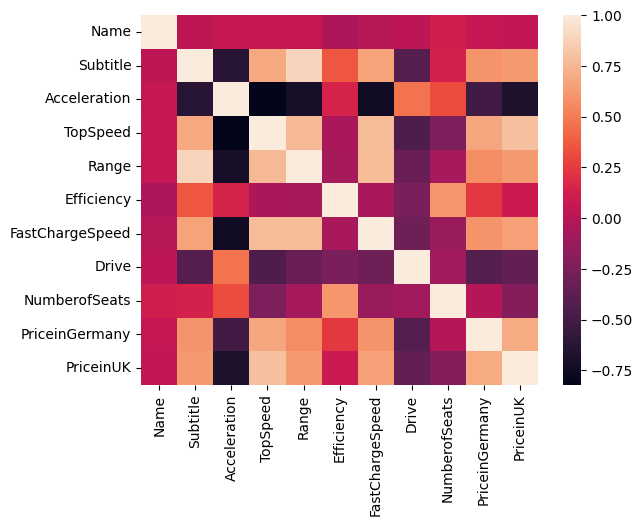

In [51]:
#Heatmap and correlation

sns.heatmap(df.corr())

In [52]:
df.corr()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
Name,1.000000,0.032038,0.066119,0.074227,0.058334,-0.042287,0.003046,0.019393,0.115914,0.054601,0.046328
Subtitle,0.032038,1.000000,-0.622985,0.691415,0.890092,0.356426,0.659743,-0.411043,0.134447,0.598084,0.621253
Acceleration,0.066119,-0.622985,1.000000,-0.821041,-0.712077,0.140984,-0.741670,0.459697,0.318302,-0.501519,-0.674273
TopSpeed,0.074227,0.691415,-0.821041,1.000000,0.760319,-0.047383,0.773190,-0.451002,-0.242567,0.678865,0.792669
Range,0.058334,0.890092,-0.712077,0.760319,1.000000,-0.072273,0.767574,-0.328654,-0.068851,0.569037,0.620757
Efficiency,-0.042287,0.356426,0.140984,-0.047383,-0.072273,1.000000,-0.059914,-0.258630,0.602469,0.239221,0.084527
FastChargeSpeed,0.003046,0.659743,-0.741670,0.773190,0.767574,-0.059914,1.000000,-0.309528,-0.119644,0.595609,0.650851
Drive,0.019393,-0.411043,0.459697,-0.451002,-0.328654,-0.258630,-0.309528,1.000000,-0.095437,-0.421908,-0.363592
NumberofSeats,0.115914,0.134447,0.318302,-0.242567,-0.068851,0.602469,-0.119644,-0.095437,1.000000,-0.012455,-0.211985
PriceinGermany,0.054601,0.598084,-0.501519,0.678865,0.569037,0.239221,0.595609,-0.421908,-0.012455,1.000000,0.698753


We can see strong positive correlation between price and range. But we can see two negative strong correlations: acceleration and range and price and acceleration. It means that when acceleration decreases price increases. But it also means that when range increases acceleration decreases

<function matplotlib.pyplot.show(close=None, block=None)>

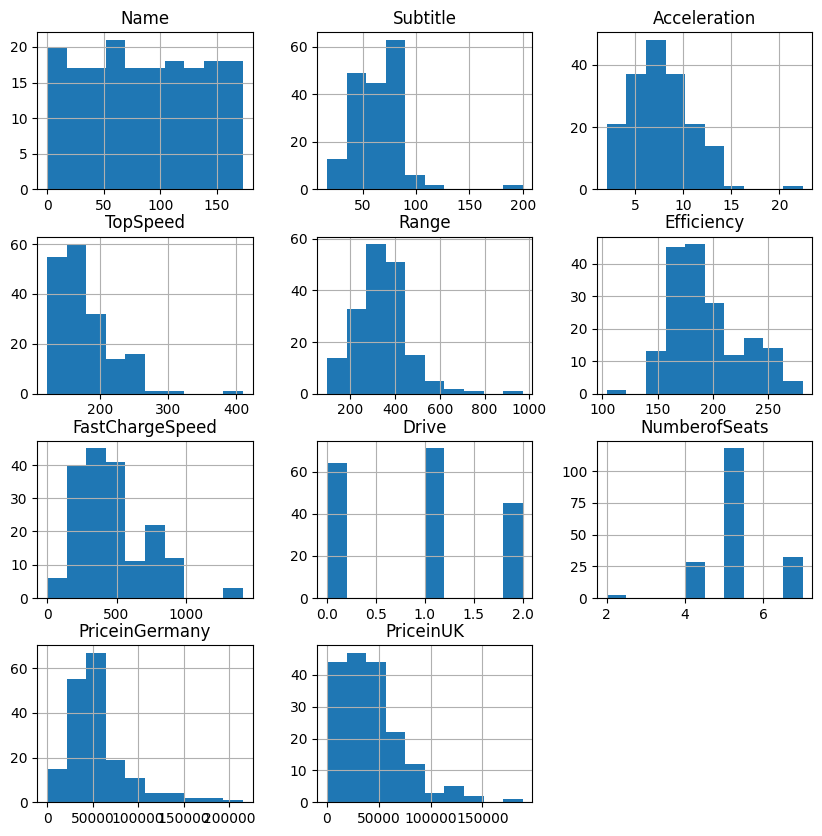

In [53]:
df.iloc[:,:].hist(figsize=(10,10))
plt.show

Now we'll see how Battery size (Subtitle), Efficiency, Range, FastChargeSpeed, and TopSpeed correlate with one another.

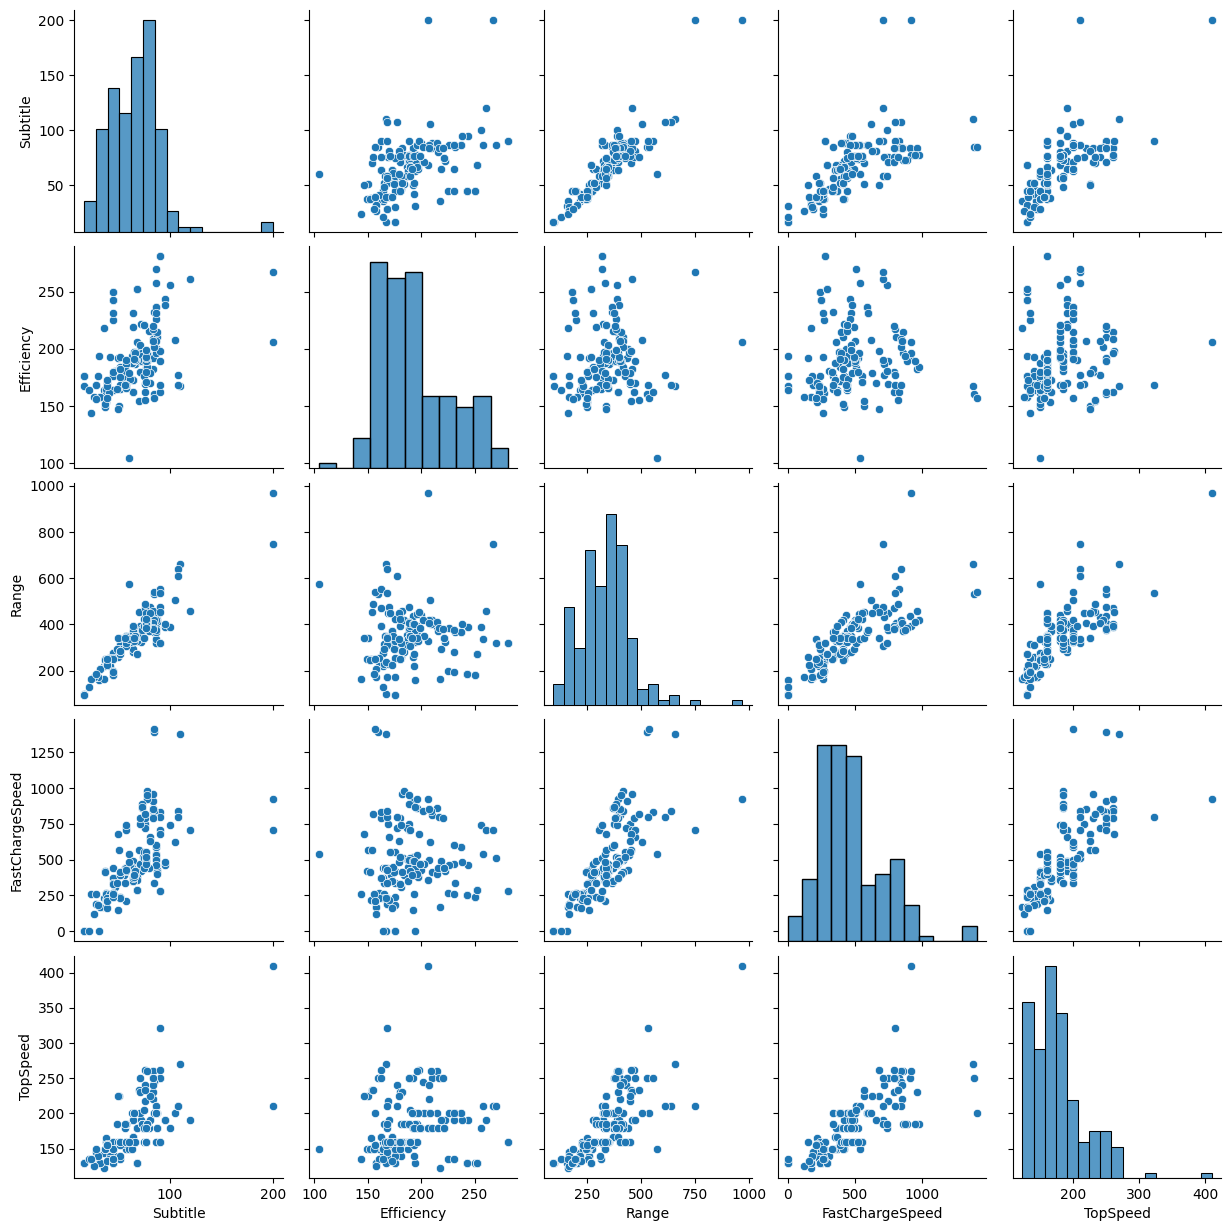

In [54]:
plots = df[['Subtitle', 'Efficiency', 'Range', 'FastChargeSpeed', 'TopSpeed']]
sns.pairplot(plots)
plt.show()

#Visualization

In [55]:
import plotly.express as px
fig = px.scatter(df, x = 'Range', y='Acceleration',hover_data=['Name'],
                color = 'PriceinGermany', trendline='ols', trendline_scope = 'overall')

fig.update_layout(
    title={
        'text': 'eletric cars scatter plot',
        'y':0.92,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'bottom'},
    legend = {'orientation': 'h'}
)

fig.show()


Acceleration in this table is expressed in seconds: how much seconds the car needs to get from 0 to 100 km/h. For example : Acceleration time 10 sec is worse than acceleration 5 sec in this case. But there's also one catch. When acceleration time decreases the total range you can drive increases. And when acceleration time descreases, range increases... the price increases too. It's quite logick. You want so fast and long-living eletric car? You have to pay more.

group cars by Range

In [93]:
cars1.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,97,58.0,7.3,150,335,173,210,1,5,42990,0
1,127,31.0,22.4,130,160,194,0,1,5,0,31680
2,94,36.0,7.9,144,220,164,230,1,5,29990,25995
3,15,86.5,5.7,200,375,231,600,0,5,0,79900
4,125,83.7,2.8,260,390,215,860,0,4,186336,138830


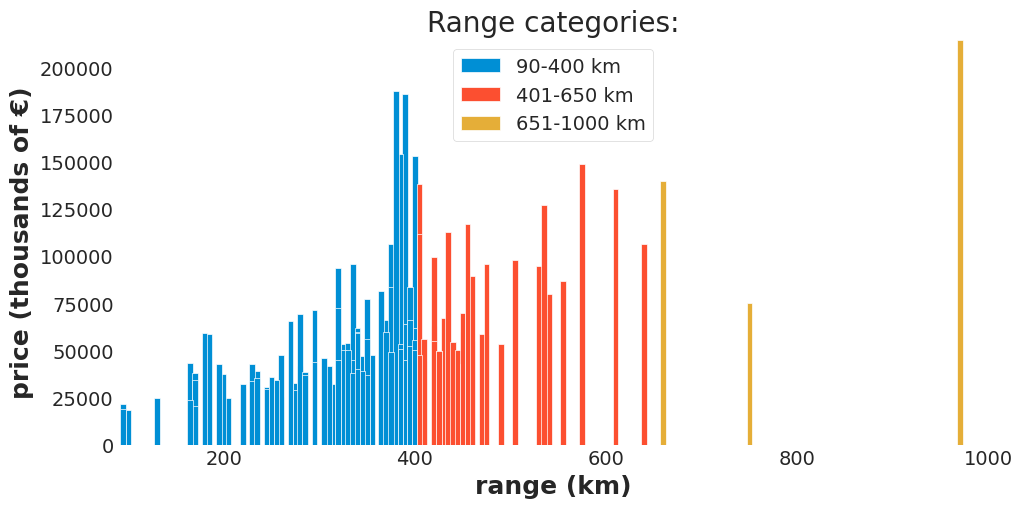

In [94]:
cars_range_from_90_to_400 = cars1.loc[cars1.Range.between(90,400)]
cars_range_from_401_to_600 = cars1.loc[cars1.Range.between(401,650)]
cars_range_from_601_to_1000 = cars1.loc[cars1.Range.between(651,1000)]

fig, ax = plt.subplots(figsize=(10,5))
plt.style.use('fivethirtyeight')
sns.set_style('white')
ax.set_ylim([0,215000])
ax.set_xlim([90, 1000])
ax.bar(cars_range_from_90_to_400['Range'], cars_range_from_90_to_400['PriceinGermany'],width=6)
ax.bar(cars_range_from_401_to_600['Range'], cars_range_from_401_to_600['PriceinGermany'],width=6)
ax.bar(cars_range_from_601_to_1000['Range'], cars_range_from_601_to_1000['PriceinGermany'],width=6)

spines = ['right', 'left', 'bottom', 'top'] #  setting spines
for spine in spines:
    ax.spines[spine].set_visible(False)

ax.xaxis.set_label_text('range (km)', fontsize = 18, weight = 'bold')
ax.yaxis.set_label_text('price (thousands of €)', fontsize = 18, weight = 'bold')
ax.set_title('Range categories:')
ax.legend(['90-400 km','401-650 km','651-1000 km'], loc="upper center")

On the plot above there is some of the cars with range between 90 - 400 km and they are more expensive than cars with range between 400 and 650. Why?

In [58]:
cars_range_from_90_to_400.loc[cars_range_from_90_to_400.PriceinGermany > 150000]

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
4,125,83.7,2.8,260,390,215,860,0,4,186336,138830
38,123,83.7,3.2,260,400,209,840,0,4,153016,115860
135,124,83.7,3.3,250,385,217,800,0,4,154444,116950
136,126,83.7,2.9,250,380,220,790,0,4,187746,139910


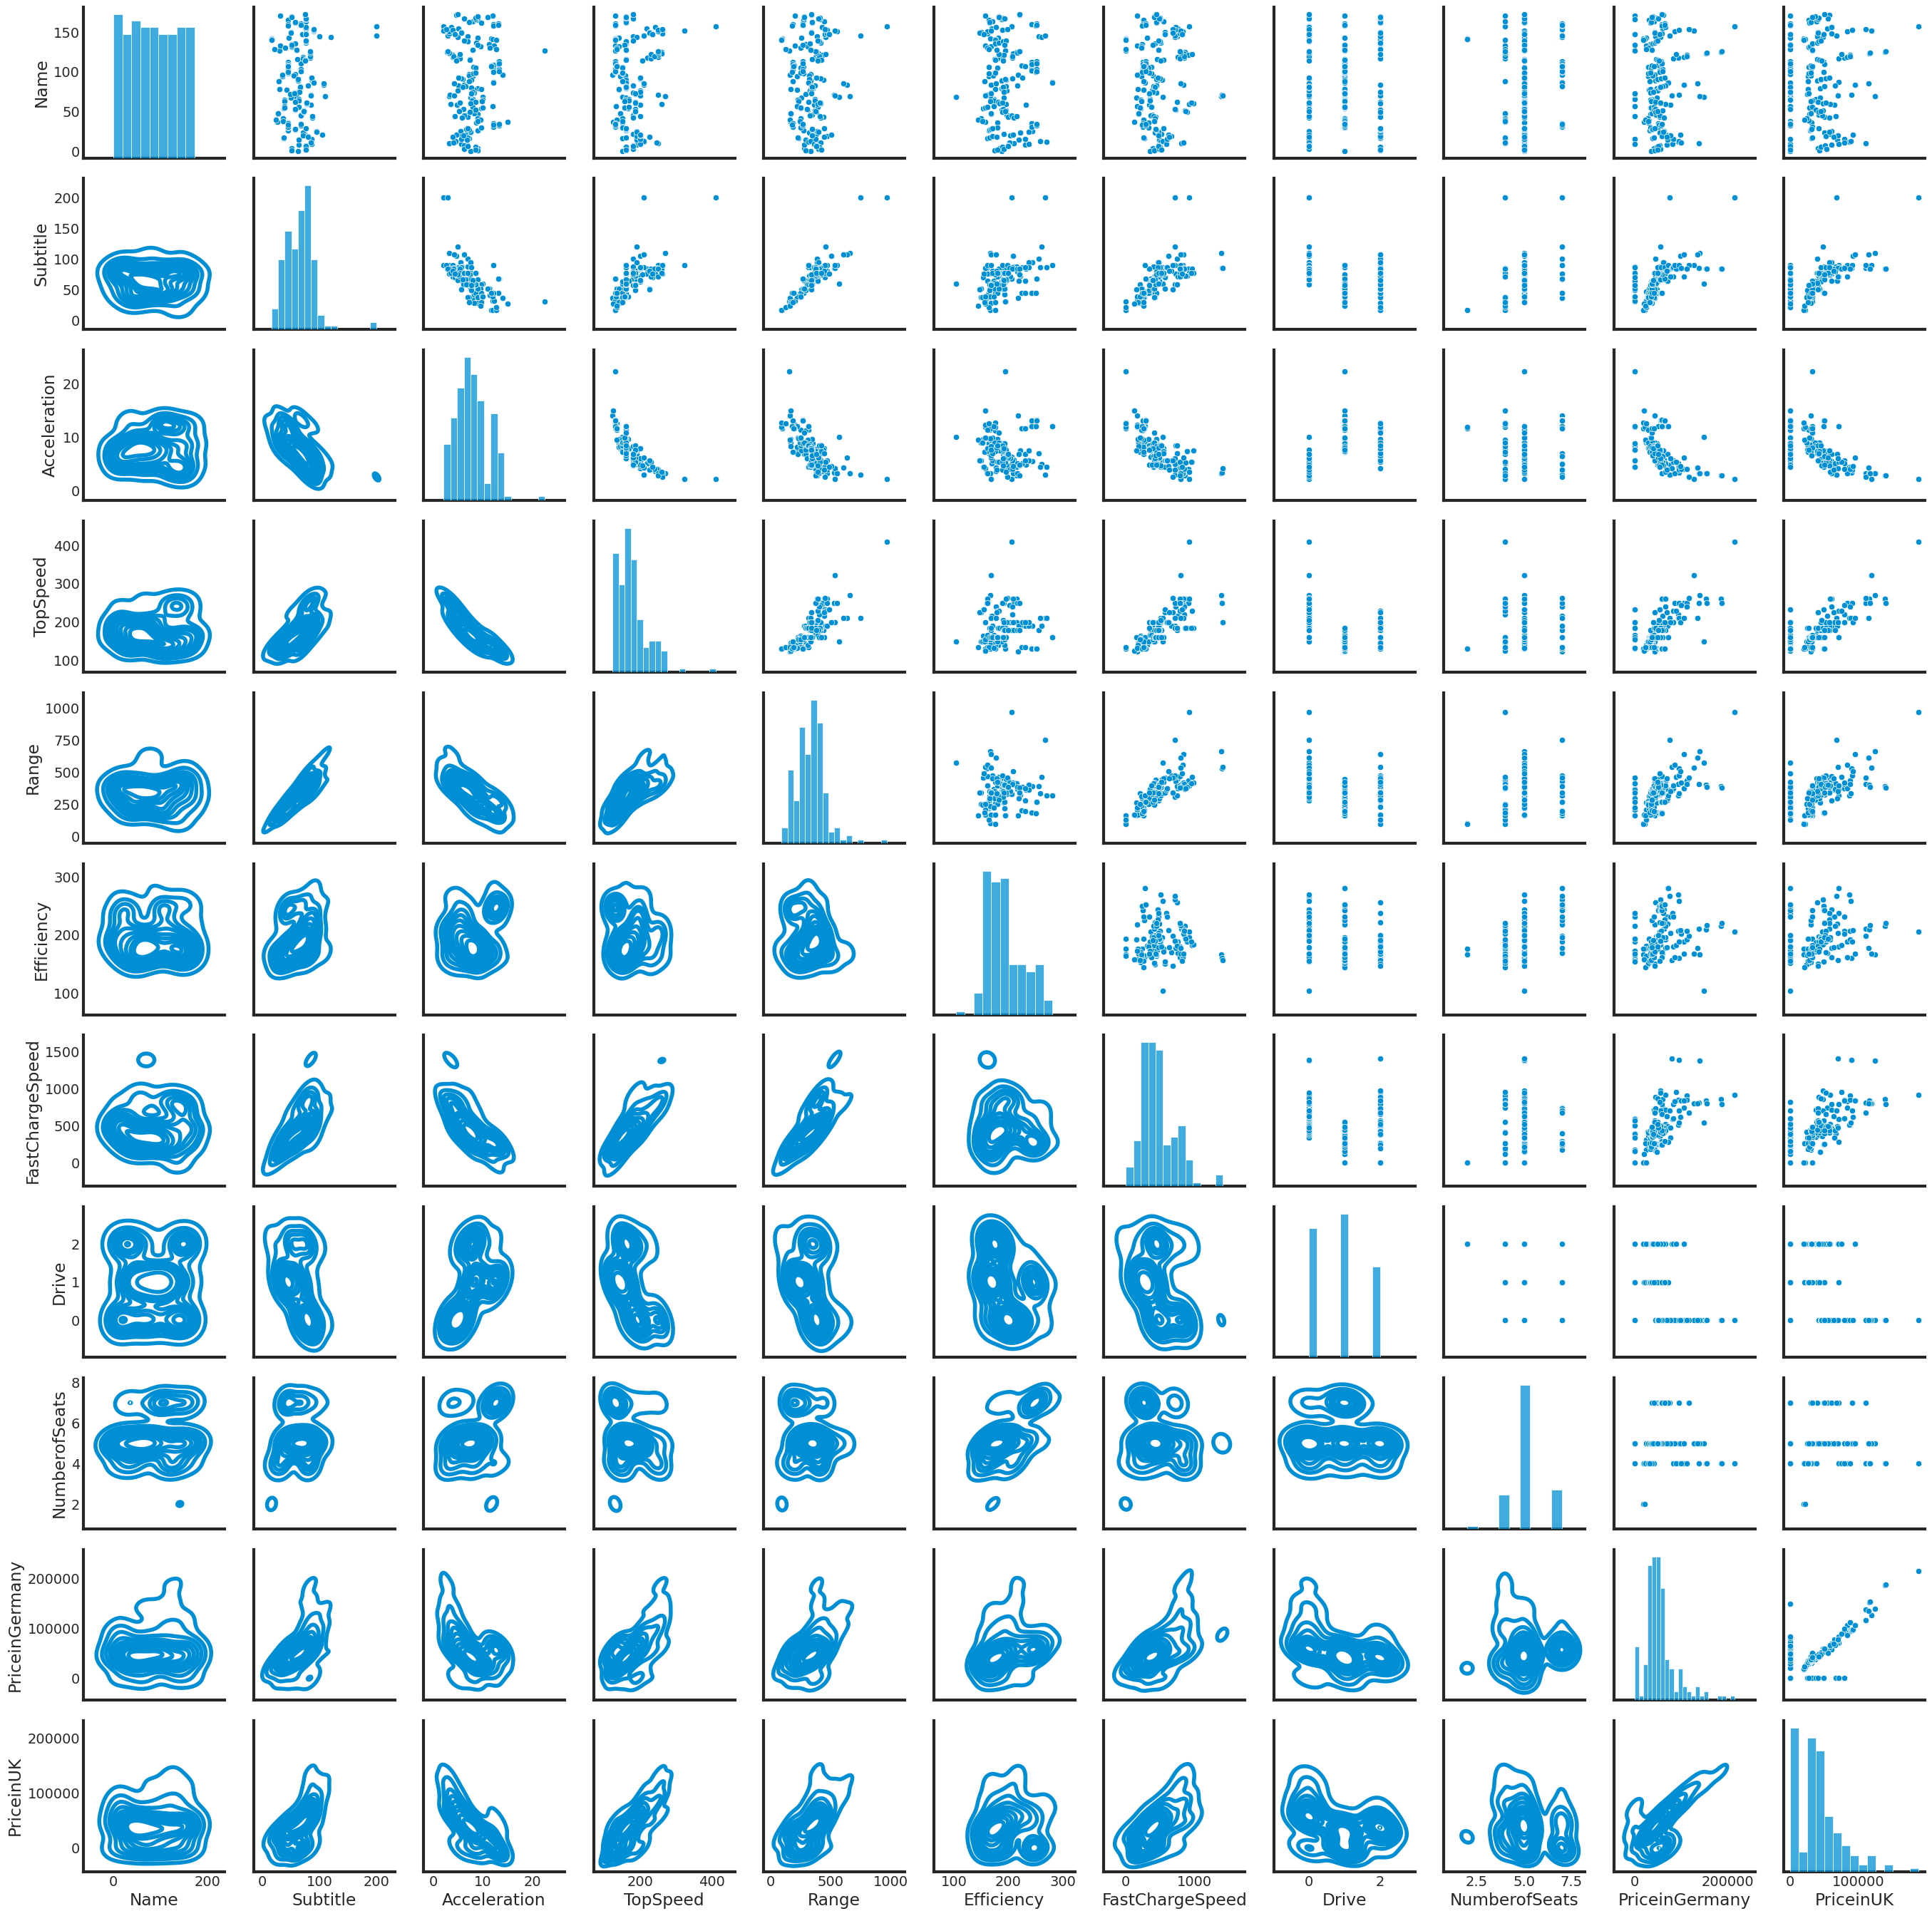

In [95]:
g = sns.PairGrid(df, diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)

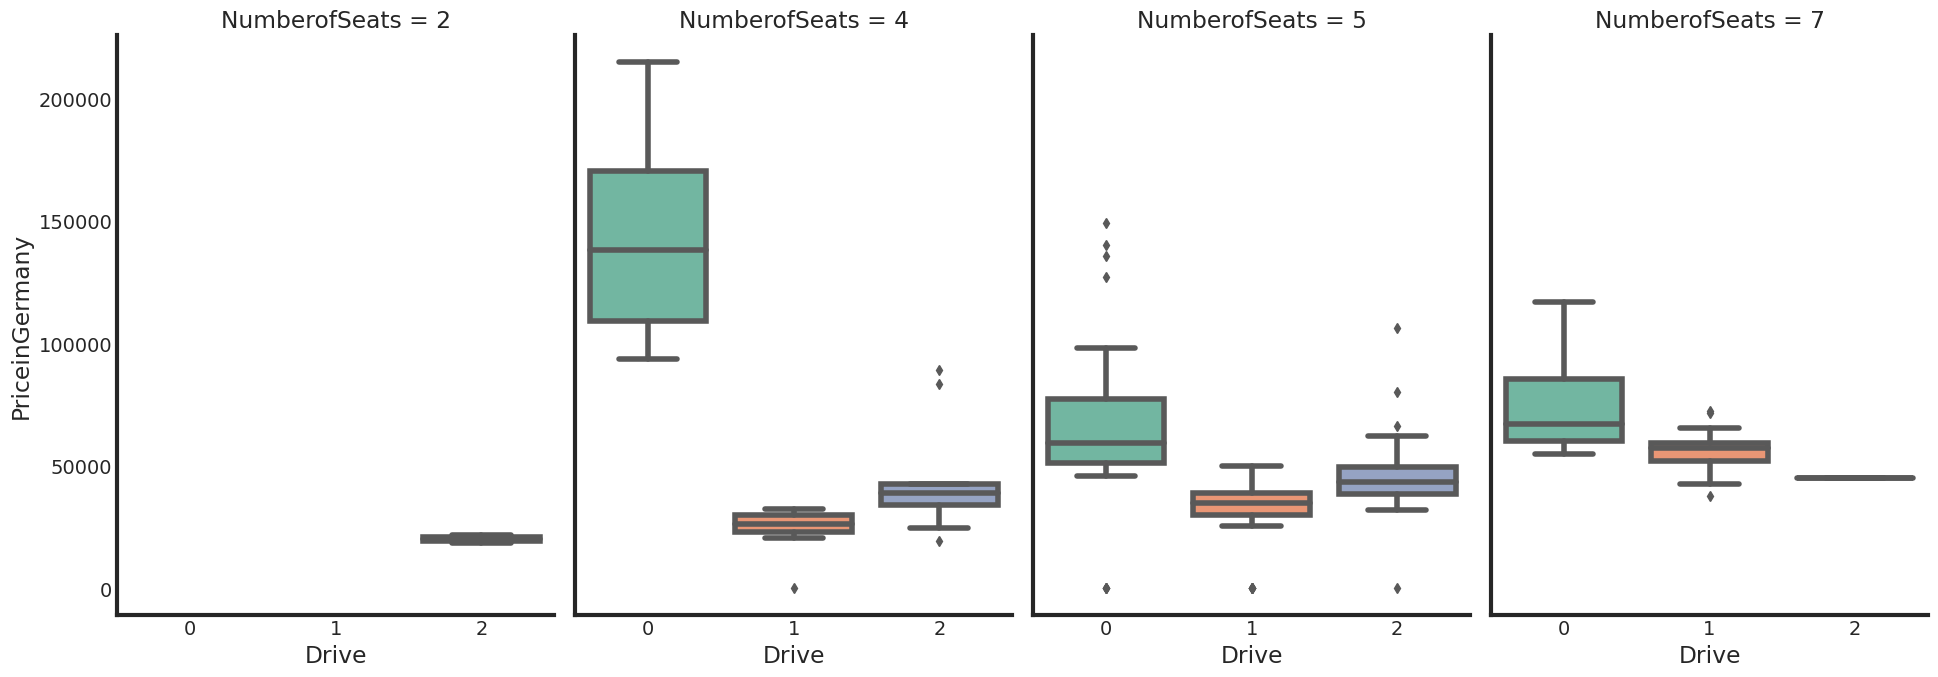

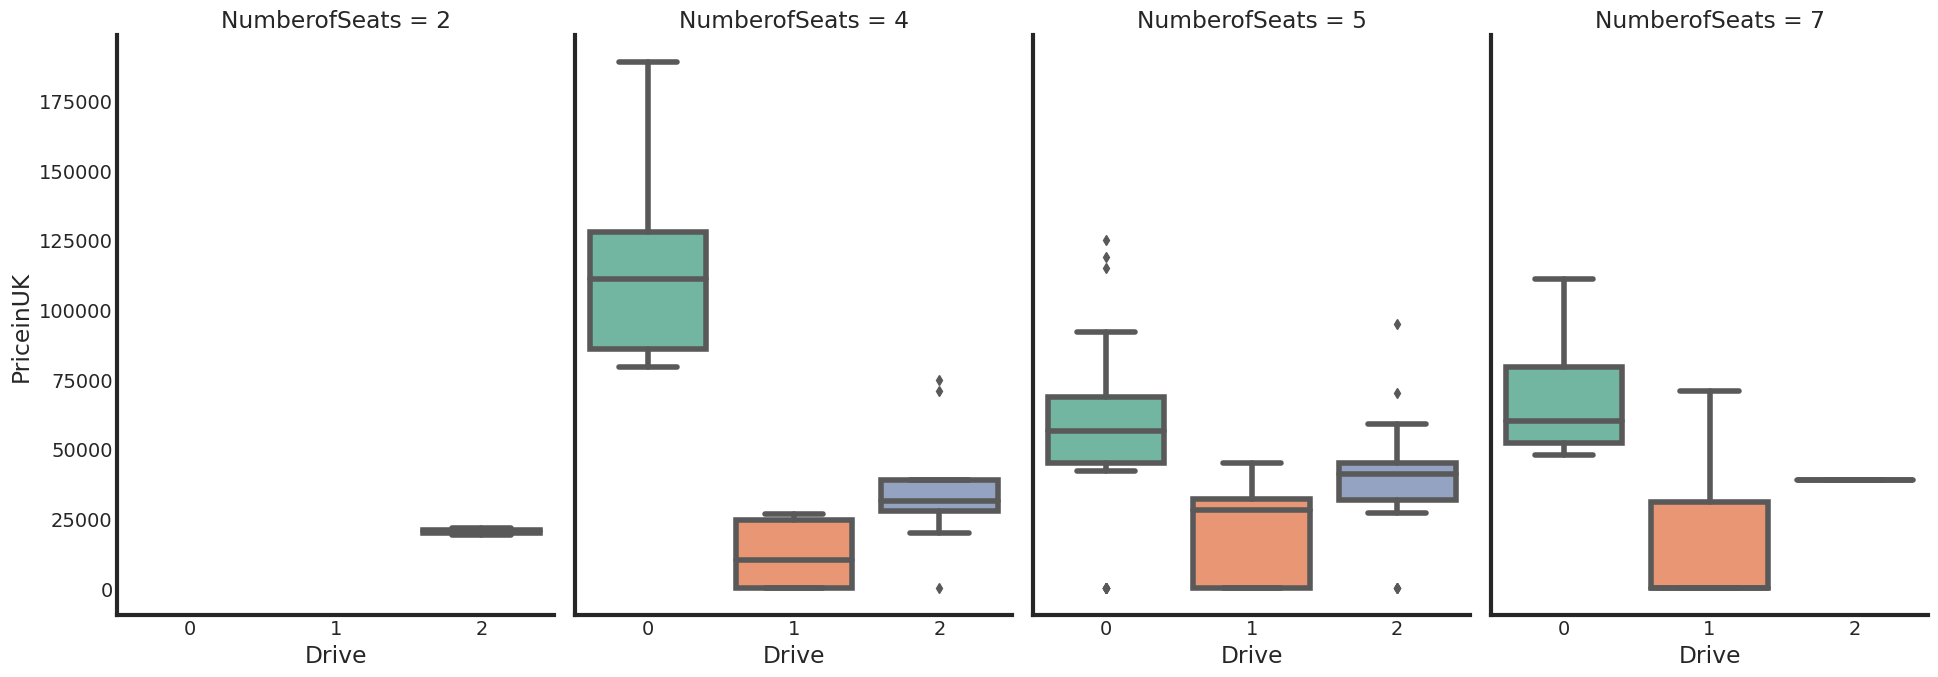

In [99]:
sns.catplot(data=df,y='PriceinGermany',x='Drive',col='NumberofSeats',kind='box',height=7,aspect=0.7,palette='Set2')

sns.catplot(data=df,y='PriceinUK',x='Drive',col='NumberofSeats',kind='box',height=7,aspect=0.7,palette='Set2')

Germans have significantly higher options in Front Wheel Drive 7 Seater market compared to UK, Otherwise the distribution is pretty similar



## Rankings

### Efficiency

In [59]:
cars2a=cars[['Name','Efficiency']]
cars2a['Efficiency(Wh/km)']=cars1['Efficiency']
cars2a=cars2a.groupby('Name',as_index=False).max()
cars2a=cars2a.sort_values('Efficiency(Wh/km)',ascending=False)
cars2a

,Name,Efficiency,Efficiency(Wh/km)
87,Mercedes EQV 300 Long,281 Wh/km,281
86,Mercedes EQV 300 Extra-Long,281 Wh/km,281
12,Audi e-tron S 55 quattro,270 Wh/km,270
146,Tesla Cybertruck Tri Motor,267 Wh/km,267
144,Tesla Cybertruck Dual Motor,261 Wh/km,261
...,...,...,...
150,Tesla Model 3 Standard Range Plus LFP,150 Wh/km,150
41,Fiat 500e Hatchback 42 kWh,149 Wh/km,149
149,Tesla Model 3 Standard Range Plus,147 Wh/km,147
40,Fiat 500e Hatchback 24 kWh,144 Wh/km,144


In [60]:
import plotly.express as px
fig = px.bar(cars2a[0:40], x='Name', y='Efficiency(Wh/km)',title="Efficiency Ranking of Electric Cars")
fig.show()

The Mercedes EQV (both Long and Extra-Long) are the most efficient with 281 Wh/km, while the Lightyear One is least efficient at only 104 Wh/km.

### Battery (subtitle)

In [61]:
cars2b=cars[['Name','Subtitle']]
cars2b['Battery (kWh)']=cars1['Subtitle']
cars2b=cars2b.groupby('Name',as_index=False).max()
cars2b=cars2b.sort_values('Battery (kWh)',ascending=False)
cars2b

,Name,Subtitle,Battery (kWh)
157,Tesla Roadster,Battery Electric Vehicle | 200 kWh,200.0
146,Tesla Cybertruck Tri Motor,Battery Electric Vehicle | 200 kWh,200.0
144,Tesla Cybertruck Dual Motor,Battery Electric Vehicle | 120 kWh,120.0
69,Lucid Air Grand Touring,Battery Electric Vehicle | 110 kWh,110.0
84,Mercedes EQS 450+,Battery Electric Vehicle | 107.8 kWh,107.8
...,...,...,...
40,Fiat 500e Hatchback 24 kWh,Battery Electric Vehicle | 23.8 kWh,23.8
129,Renault Twingo Electric,Battery Electric Vehicle | 21.3 kWh,21.3
142,Smart EQ fortwo coupe,Battery Electric Vehicle | 16.7 kWh,16.7
141,Smart EQ fortwo cabrio,Battery Electric Vehicle | 16.7 kWh,16.7


In [62]:
fig = px.bar(cars2b[0:40], x='Name', y='Battery (kWh)',title="Battery Electricity Usage Ranking of Electric Cars")
fig.show()

As we can see, the Tesla Roadster and Cybertruck use the most energy, while the Smart EQ 3 uses the least.

### Range

In [63]:
cars2c=cars[['Name','Range']]
cars2c['Range (km)']=cars1['Range']
cars2c=cars2c.groupby('Name',as_index=False).max()
cars2c=cars2c.sort_values('Range (km)',ascending=False)
cars2c

,Name,Range,Range (km)
157,Tesla Roadster,970 km,970
146,Tesla Cybertruck Tri Motor,750 km,750
69,Lucid Air Grand Touring,660 km,660
84,Mercedes EQS 450+,640 km,640
85,Mercedes EQS 580 4MATIC,610 km,610
...,...,...,...
127,Renault Kangoo Maxi ZE 33,160 km,160
129,Renault Twingo Electric,130 km,130
142,Smart EQ fortwo coupe,100 km,100
141,Smart EQ fortwo cabrio,95 km,95


In [64]:
fig = px.bar(cars2c[0:40], x='Name', y='Range (km)',title="Range Ranking of Electric Cars")
fig.show()

Again the Tesla Roadster and Cybertruck Tri Motor rank at the top, while the Smart EQ forfour ranks at the bottom.

### Top Speed

In [65]:
cars2d=cars[['Name','TopSpeed']]
cars2d['TopSpeed (km/h)']=cars1['TopSpeed']
cars2d=cars2d.groupby('Name',as_index=False).max()
cars2d=cars2d.sort_values('TopSpeed (km/h)',ascending=False)
cars2d

,Name,TopSpeed,TopSpeed (km/h)
157,Tesla Roadster,410 km/h,410
152,Tesla Model S Plaid,322 km/h,322
69,Lucid Air Grand Touring,270 km/h,270
154,Tesla Model X Plaid,262 km/h,262
148,Tesla Model 3 Performance,261 km/h,261
...,...,...,...
141,Smart EQ fortwo cabrio,130 km/h,130
140,Smart EQ forfour,130 km/h,130
171,Volkswagen e-Up!,130 km/h,130
37,Dacia Spring Electric,125 km/h,125


In [66]:
fig = px.bar(cars2d[0:40], x = 'Name', y= 'TopSpeed (km/h)', title = 'Top Speed Rankings of Electric Cars')
fig.show()

The Tesla Roadster has the fastest top speed, while the Nissan e-NV200 Evalia is the slowest.

### ChargeSpeed

In [67]:
cars2e=cars[['Name','FastChargeSpeed']]
cars2e['FastChargeSpeed (km/h)']=cars1['FastChargeSpeed']
cars2e=cars2e.groupby('Name',as_index=False).max()
cars2e=cars2e.sort_values('FastChargeSpeed (km/h)',ascending=False)
cars2e

,Name,FastChargeSpeed,FastChargeSpeed (km/h)
70,Lucid Air Pure,1410 km/h,1410
71,Lucid Air Touring,1390 km/h,1390
69,Lucid Air Grand Touring,1380 km/h,1380
60,Kia EV6 Long Range 2WD,980 km/h,980
122,Porsche Taycan Plus,960 km/h,960
...,...,...,...
127,Renault Kangoo Maxi ZE 33,-,0
141,Smart EQ fortwo cabrio,-,0
140,Smart EQ forfour,-,0
129,Renault Twingo Electric,-,0


In [68]:
fig = px.bar(cars2e[0:40], x = 'Name', y = 'FastChargeSpeed (km/h)', title = 'Charge Speed of Electric Cars')
fig.show()

Lucid Air Owns the top 3 spots for charge speed, while the Dacia Spring Electric has the slowest non-zero charge speed

## Statistics and Hypothesis testing

Now let's look at the data by country to form and test hypotheses.

### Hypothesis 1:
7-seaters, on average are more efficient than 2 seaters.

$ 𝐻\_{0}:\mu\_{1}-\mu\_{2} = 0 $ There is no difference between the average efficiency of 7 seaters and 2 seaters. \
$ 𝐻\_{A}:\mu\_{1}-\mu\_{2} != 0 $ There is a difference between the average efficiency of 7- and 2-seaters.

In [69]:
cars3a=cars[['Name','Efficiency', 'NumberofSeats']]
cars3a['Efficiency(Wh/km)']=cars1['Efficiency']
cars3a=cars3a.groupby('Name',as_index=False).max()
cars3a=cars3a.sort_values('Efficiency(Wh/km)',ascending=False)

In [70]:
seven_seater = cars3a.loc[cars.NumberofSeats == 7]
two_seater = cars3a.loc[cars.NumberofSeats == 2]

In [71]:
seven_eff = seven_seater['Efficiency(Wh/km)']
two_eff = two_seater['Efficiency(Wh/km)']

<Axes: xlabel='Efficiency(Wh/km)', ylabel='Density'>

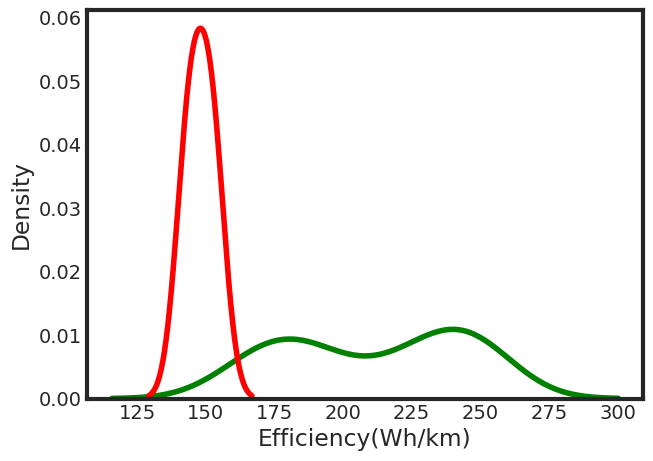

In [72]:
sns.distplot(seven_eff, color = 'green', hist = False)
sns.distplot(two_eff, color = 'red', hist = False)

In [73]:
seven_seater['Efficiency(Wh/km)'].mean()

211.51612903225808

In [74]:
two_seater['Efficiency(Wh/km)'].mean()

148.0

#### Test stats, T-tests, and p-tests:

In [75]:
alpha = .05
t_value, p_value = stats.ttest_ind(seven_eff, two_eff)
print('t_value = ', t_value, ", p_value = ", p_value)

t_value =  2.7686113539547423 , p_value =  0.00941688431340065


In [76]:
if p_value < alpha :
    print('Conclusion: since p_value {} is less than alpha {}'.format(p_value, alpha))
    print('Reject the null that there is no difference between two seater efficiency and seven seater efficiency')

else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_value,alpha))
    print("Fail to reject the null hypothesis that there is a difference between efficiency of two seaters and seven seaters.")

Conclusion: since p_value 0.00941688431340065 is less than alpha 0.05
Reject the null that there is no difference between two seater efficiency and seven seater efficiency


### Hypothesis 2:
There is a significant difference in the average range of 4- and 5-seated vehicles.

$ 𝐻\_{0}:\mu\_{1}-\mu\_{2} = 0 $ There is no difference between the average range of 4-seaters and 5-seaters. \
$ 𝐻\_{A}:\mu\_{1}-\mu\_{2} != 0 $ There is a difference between the average range of 4- and 5-seaters.

In [77]:
cars3b=cars[['Name','Range', 'NumberofSeats']]
cars3b['Range(km)']=cars1['Range']
cars3b=cars3b.groupby('Name',as_index=False).max()
cars3b=cars3b.sort_values('Range',ascending=False)

In [78]:
four_seater = cars3b.loc[cars3b.NumberofSeats == 4]
five_seater = cars3b.loc[cars3b.NumberofSeats == 5]

In [79]:
four_range = four_seater['Range(km)']
five_range = five_seater['Range(km)']

<Axes: xlabel='Range(km)', ylabel='Density'>

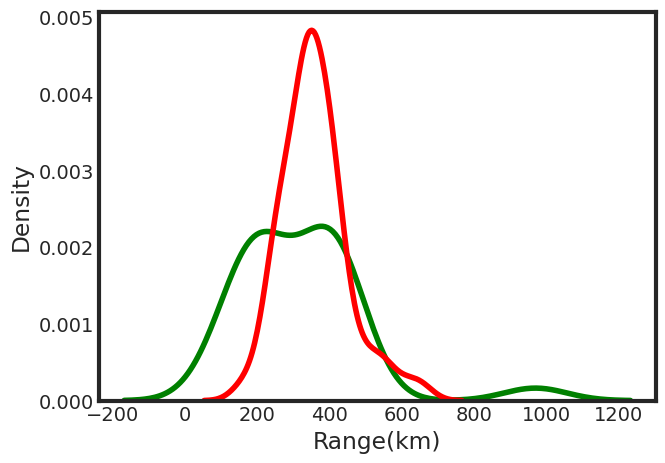

In [80]:
sns.distplot(four_range, color = 'green', hist = False)
sns.distplot(five_range, color = 'red', hist = False)

In [81]:
four_seater['Range(km)'].mean()

320.5357142857143

In [82]:
five_seater['Range(km)'].mean()

359.10714285714283

#### Test stats, T-tests, and p-tests:

In [83]:
alpha = .05
t_value, p_value = stats.ttest_ind(four_range, five_range)
print('t_value = ', t_value, ", p_value = ", p_value)

t_value =  -1.6395076612643797 , p_value =  0.10338526677270023


In [84]:
if p_value < alpha :
    print('Conclusion: since p_value {} is less than alpha {}'.format(p_value, alpha))
    print('Reject the null that there is no difference between four seater range and five seater range')

else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_value,alpha))
    print("Fail to reject the null hypothesis that there is a difference between range of four and five seaters.")

Conclusion: since p_value 0.10338526677270023 is greater than alpha 0.05 
Fail to reject the null hypothesis that there is a difference between range of four and five seaters.


### Hypothesis 3:
7-seaters have a bigger battery than other cars

In [85]:
cars3c=cars[['Name','Subtitle', 'NumberofSeats']]
cars3c['Battery (kWh)']=cars1['Subtitle']
cars3c=cars3c.groupby('Name',as_index=False).max()
cars3c=cars3c.sort_values('Battery (kWh)',ascending=False)

In [86]:
seven_seater2 = cars3c.loc[cars3c.NumberofSeats == 7]
other_seater = cars3c.loc[cars3c.NumberofSeats != 7]

In [87]:
seven_battery = seven_seater2['Battery (kWh)']
other_battery = other_seater['Battery (kWh)']

<Axes: xlabel='Battery (kWh)', ylabel='Density'>

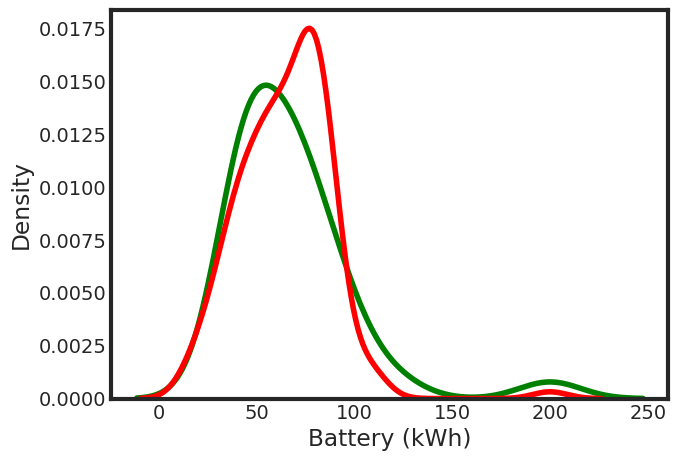

In [88]:
sns.distplot(seven_battery, color = 'green', hist = False)
sns.distplot(other_battery, color = 'red', hist = False)

In [89]:
seven_seater2['Battery (kWh)'].mean()

67.609375

In [90]:
other_seater['Battery (kWh)'].mean()

64.60422535211266

#### Test stats, T-tests, p-tests

In [91]:
alpha = .05
t_value, p_value = stats.ttest_ind(four_range, five_range)
print('t_value = ', t_value, ", p_value = ", p_value)

t_value =  -1.6395076612643797 , p_value =  0.10338526677270023


In [92]:
if p_value < alpha :
    print('Conclusion: since p_value {} is less than alpha {}'.format(p_value, alpha))
    print('Reject the null that there is no difference in average battery size between seven seaters range and other cars')

else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_value,alpha))
    print("Fail to reject the null hypothesis that there is a difference between the average battery size of seven and other seaters.")

Conclusion: since p_value 0.10338526677270023 is greater than alpha 0.05 
Fail to reject the null hypothesis that there is a difference between the average battery size of seven and other seaters.


## Next steps and conclusions

The next steps in this analysis should include a regression model to determine EV pricing based on the variables discussed in this EDA. Doing so would allow analysts to determine the different variables affecting EV price.

The dataset was easy to use. With some cleaning, analysis was much easier and more effective.